In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Importing CSV file.
csv_file_path = 'Hourly data.csv'
df = pd.read_csv(csv_file_path)

In [3]:
print(df)

                  City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   
2188  Windsor Downtown  2022-12-30     0.2     0.3     0.3     0.2     0.2   
2189  Windsor Downtown  2022-12-31     NaN     NaN     NaN     NaN     NaN   

     SO2-H06 SO2-H07 SO2-H08  ... NOx-H15 NOx-H16 NOx-H17 NOx-H

In [4]:
df.head()

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4,4,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,1 .8,13.3,17.9,21.1,5 .5,71.9,3 .1,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,2 .2,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12,12.3,12.4,8.4,9.1


In [5]:
df.isnull().sum()

City         0
Date         0
SO2-H01    705
SO2-H02    635
SO2-H03    688
          ... 
NOx-H20      2
NOx-H21      4
NOx-H22      5
NOx-H23      3
NOx-H24      2
Length: 170, dtype: int64

In [6]:
df.info

<bound method DataFrame.info of                   City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   
2188  Windsor Downtown  2022-12-30     0.2     0.3     0.3     0.2     0.2   
2189  Windsor Downtown  2022-12-31     NaN     NaN     NaN     NaN     NaN   

     SO2-H06 SO2-H07 SO2-H08  .

In [7]:
df.describe()

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
count,2190,2190,1485,1555,1502,1482,1518,1516,1531,1576,...,2177,2172,2178,2185,2187,2188,2186,2185,2187,2188
unique,6,365,68,61,62,66,59,68,66,71,...,305,299,306,315,314,353,357,375,386,385
top,Ottawa Downtown,2022-01-01,,,,,,,,,...,4,4,4,4,4,5,4,5,4,4
freq,365,6,578,515,564,599,558,564,523,477,...,50,57,49,47,58,41,39,44,41,48


In [8]:
100 - (len(df.dropna())/len(df))*100

46.80365296803652

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [10]:
df = pd.read_csv("Hourly data.csv", na_values=' ')
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4,4,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,1 .8,13.3,17.9,21.1,5 .5,71.9,3 .1,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,2 .2,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12,12.3,12.4,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,2022-12-27,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.6,9.5,1.3,1.3,1.5,8,8.5,9.2,1.4,8.5
2186,Windsor Downtown,2022-12-28,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,11,1.8,14.2,15.1,9.4,9.4,9.3,1.2,8.1,7.7
2187,Windsor Downtown,2022-12-29,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,14.2,12.9,12.2,12,11.9,9.5,9,9.4,8.1,6.8
2188,Windsor Downtown,2022-12-30,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,11.6,9.5,9.4,1.8,15.5,13,9.9,13.5,2.3,17


In [12]:
df.shape

(2190, 170)

In [13]:
col = df.columns
print("The different columns are: \n",col)

The different columns are: 
 Index(['City', 'Date ', 'SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05',
       'SO2-H06', 'SO2-H07', 'SO2-H08',
       ...
       'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20',
       'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24'],
      dtype='object', length=170)


In [14]:
# To find out different datatypes in the dataset. 
d_types = df.dtypes
print("The different Data Types are:\n",d_types)

The different Data Types are:
 City        object
Date        object
SO2-H01    float64
SO2-H02     object
SO2-H03    float64
            ...   
NOx-H20     object
NOx-H21     object
NOx-H22     object
NOx-H23     object
NOx-H24     object
Length: 170, dtype: object


In [15]:
convert = [
    'SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24',
    'CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24',
    'NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24',
    'NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24',
    'O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24',
    'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24',
    'NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24'
]

# Iterate through the columns and convert all non float values to float.
for column in convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Save the updated DataFrame. 
df.to_csv('updated_file.csv', index=False)
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6.0,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4.0,4.0,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,NaN,13.3,17.9,21.1,NaN,71.9,NaN,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,NaN,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12.0,12.3,12.4,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,2022-12-27,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.6,9.5,1.3,1.3,1.5,8.0,8.5,9.2,1.4,8.5
2186,Windsor Downtown,2022-12-28,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,11.0,1.8,14.2,15.1,9.4,9.4,9.3,1.2,8.1,7.7
2187,Windsor Downtown,2022-12-29,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,14.2,12.9,12.2,12.0,11.9,9.5,9.0,9.4,8.1,6.8
2188,Windsor Downtown,2022-12-30,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,11.6,9.5,9.4,1.8,15.5,13.0,9.9,13.5,2.3,17.0


In [16]:
fix = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

for column in fix:
    if df[column].dtype == 'object':
        try:
            df[column] = df[column].str.replace(' ', '').astype(float)
        except ValueError as e:
            print(f"Error in column '{column}': {e}")
    else:
        print(f"Column '{column}' is not of string type and cannot be modified.")

Column 'SO2-H01' is not of string type and cannot be modified.
Column 'SO2-H02' is not of string type and cannot be modified.
Column 'SO2-H03' is not of string type and cannot be modified.
Column 'SO2-H04' is not of string type and cannot be modified.
Column 'SO2-H05' is not of string type and cannot be modified.
Column 'SO2-H06' is not of string type and cannot be modified.
Column 'SO2-H07' is not of string type and cannot be modified.
Column 'SO2-H08' is not of string type and cannot be modified.
Column 'SO2-H09' is not of string type and cannot be modified.
Column 'SO2-H10' is not of string type and cannot be modified.
Column 'SO2-H11' is not of string type and cannot be modified.
Column 'SO2-H12' is not of string type and cannot be modified.
Column 'SO2-H13' is not of string type and cannot be modified.
Column 'SO2-H14' is not of string type and cannot be modified.
Column 'SO2-H15' is not of string type and cannot be modified.
Column 'SO2-H16' is not of string type and cannot be mo

In [17]:
# Columns which we need to convert to float.
convert = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']  # Add the columns you want to convert

# Iterate through the columns & convert all those to float.
for column in convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Save the updated DataFrame. 
df.to_csv('updated_file.csv', index=False)
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6.0,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4.0,4.0,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,NaN,13.3,17.9,21.1,NaN,71.9,NaN,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,NaN,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12.0,12.3,12.4,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,2022-12-27,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.6,9.5,1.3,1.3,1.5,8.0,8.5,9.2,1.4,8.5
2186,Windsor Downtown,2022-12-28,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,11.0,1.8,14.2,15.1,9.4,9.4,9.3,1.2,8.1,7.7
2187,Windsor Downtown,2022-12-29,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,14.2,12.9,12.2,12.0,11.9,9.5,9.0,9.4,8.1,6.8
2188,Windsor Downtown,2022-12-30,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,11.6,9.5,9.4,1.8,15.5,13.0,9.9,13.5,2.3,17.0


In [18]:
types = df.dtypes
print("The different Data Types are:\n",types)

The different Data Types are:
 City        object
Date        object
SO2-H01    float64
SO2-H02    float64
SO2-H03    float64
            ...   
NOx-H20    float64
NOx-H21    float64
NOx-H22    float64
NOx-H23    float64
NOx-H24    float64
Length: 170, dtype: object


In [19]:
# To find out the shape of the dataset.
shape = df.shape
print("The Shape of dataset is: \n",shape)

The Shape of dataset is: 
 (2190, 170)


In [20]:
#To find the missing values in dataset.
missing_counts = df.isnull().sum()
print("The missing values are:\n",missing_counts)

The missing values are:
 City          0
Date          0
SO2-H01    1283
SO2-H02    1151
SO2-H03    1252
           ... 
NOx-H20      56
NOx-H21      58
NOx-H22      61
NOx-H23      60
NOx-H24      57
Length: 170, dtype: int64


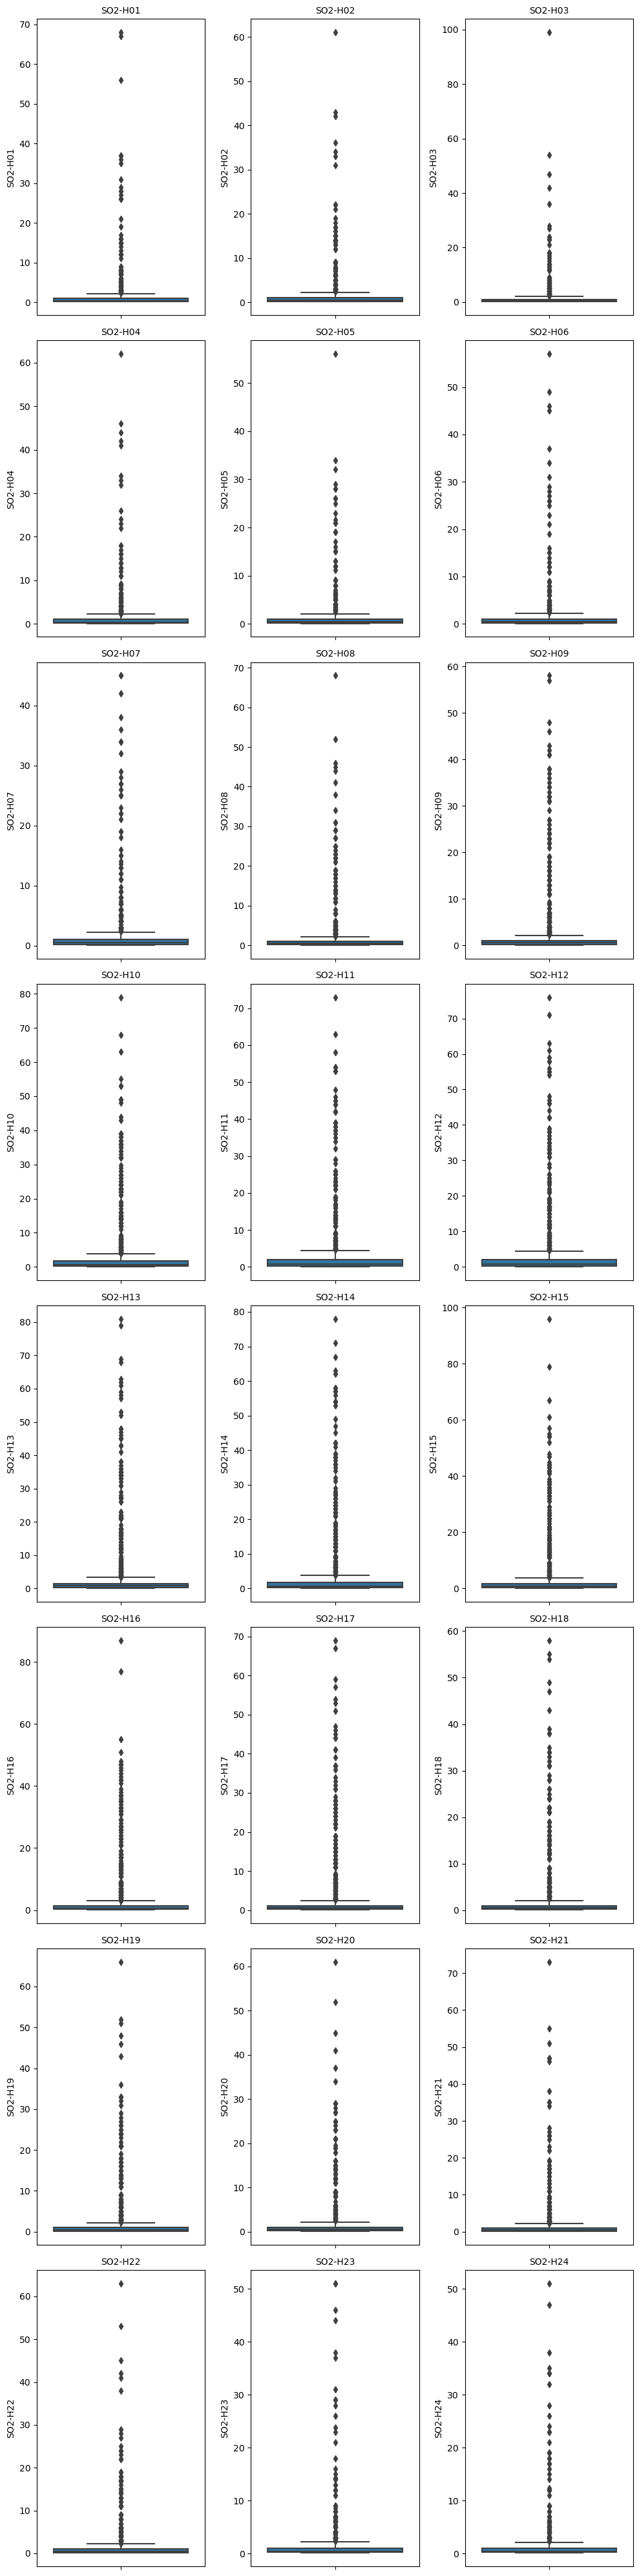

In [21]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

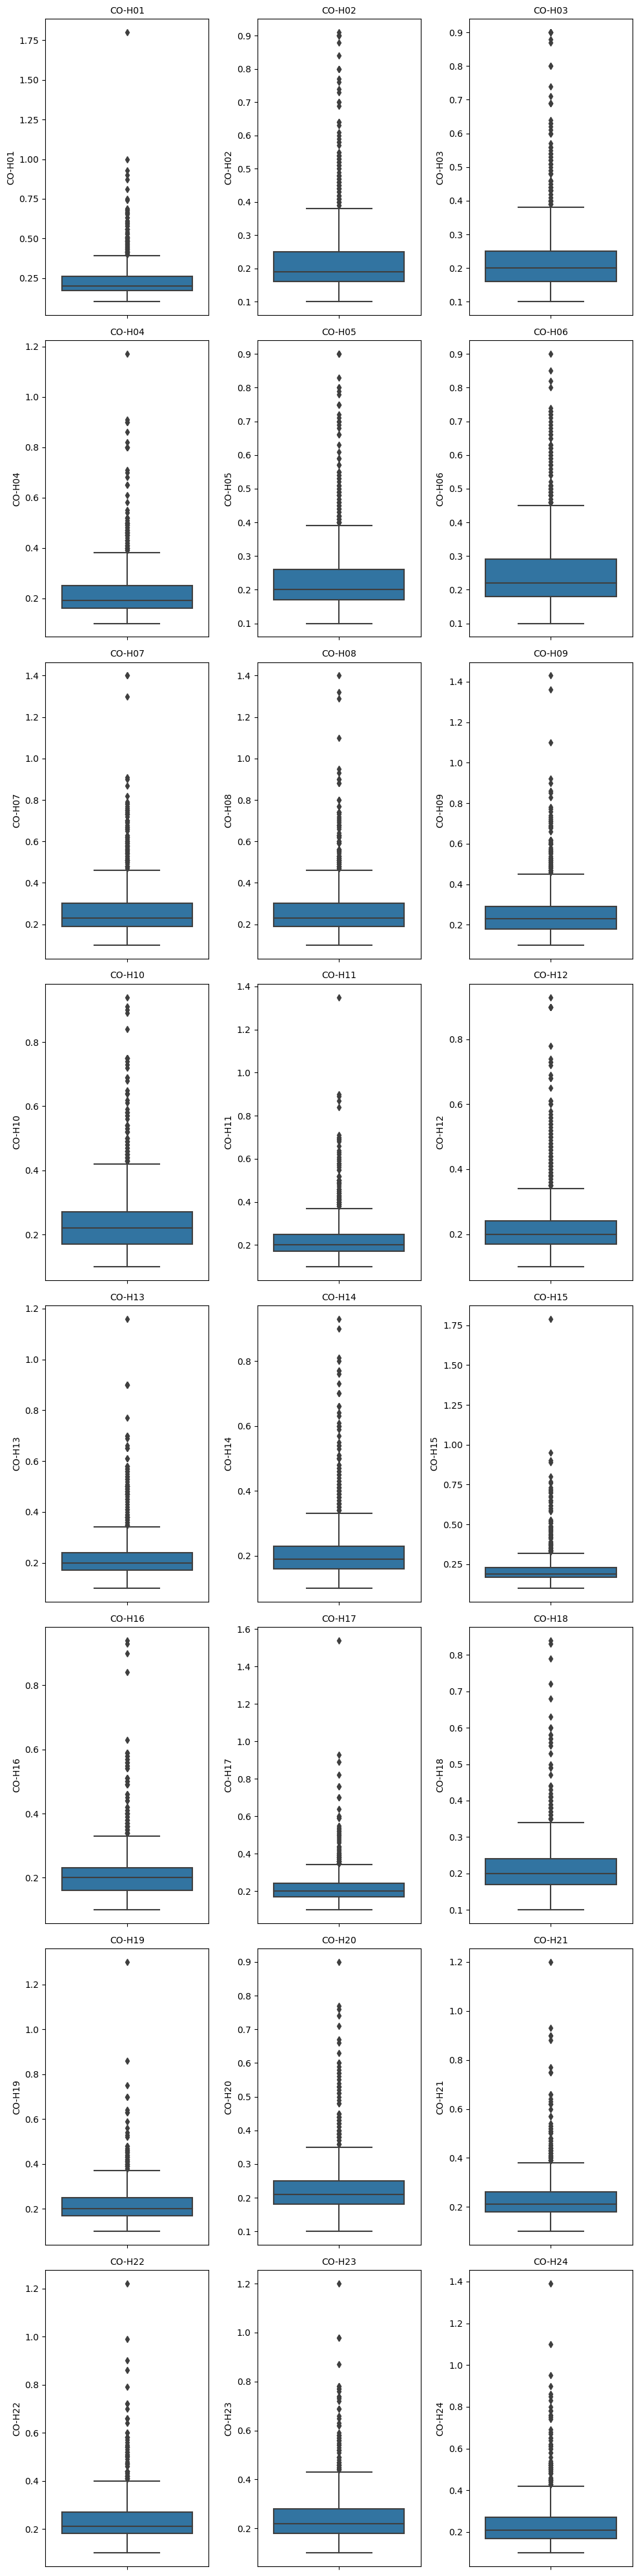

In [22]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

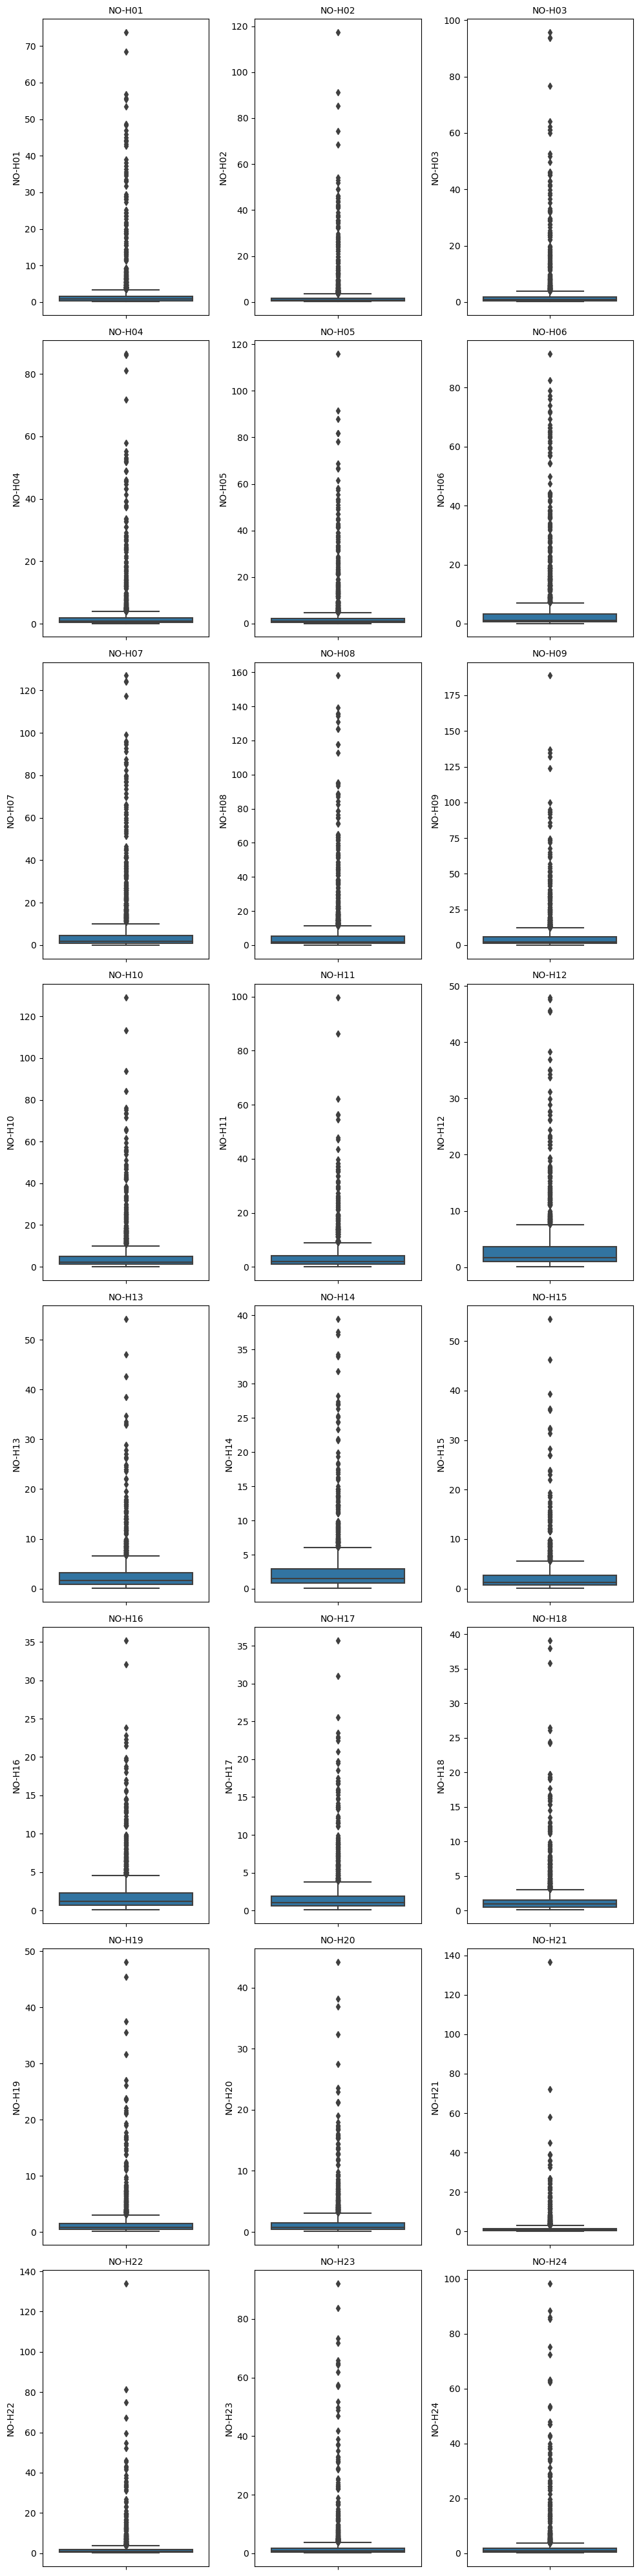

In [23]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

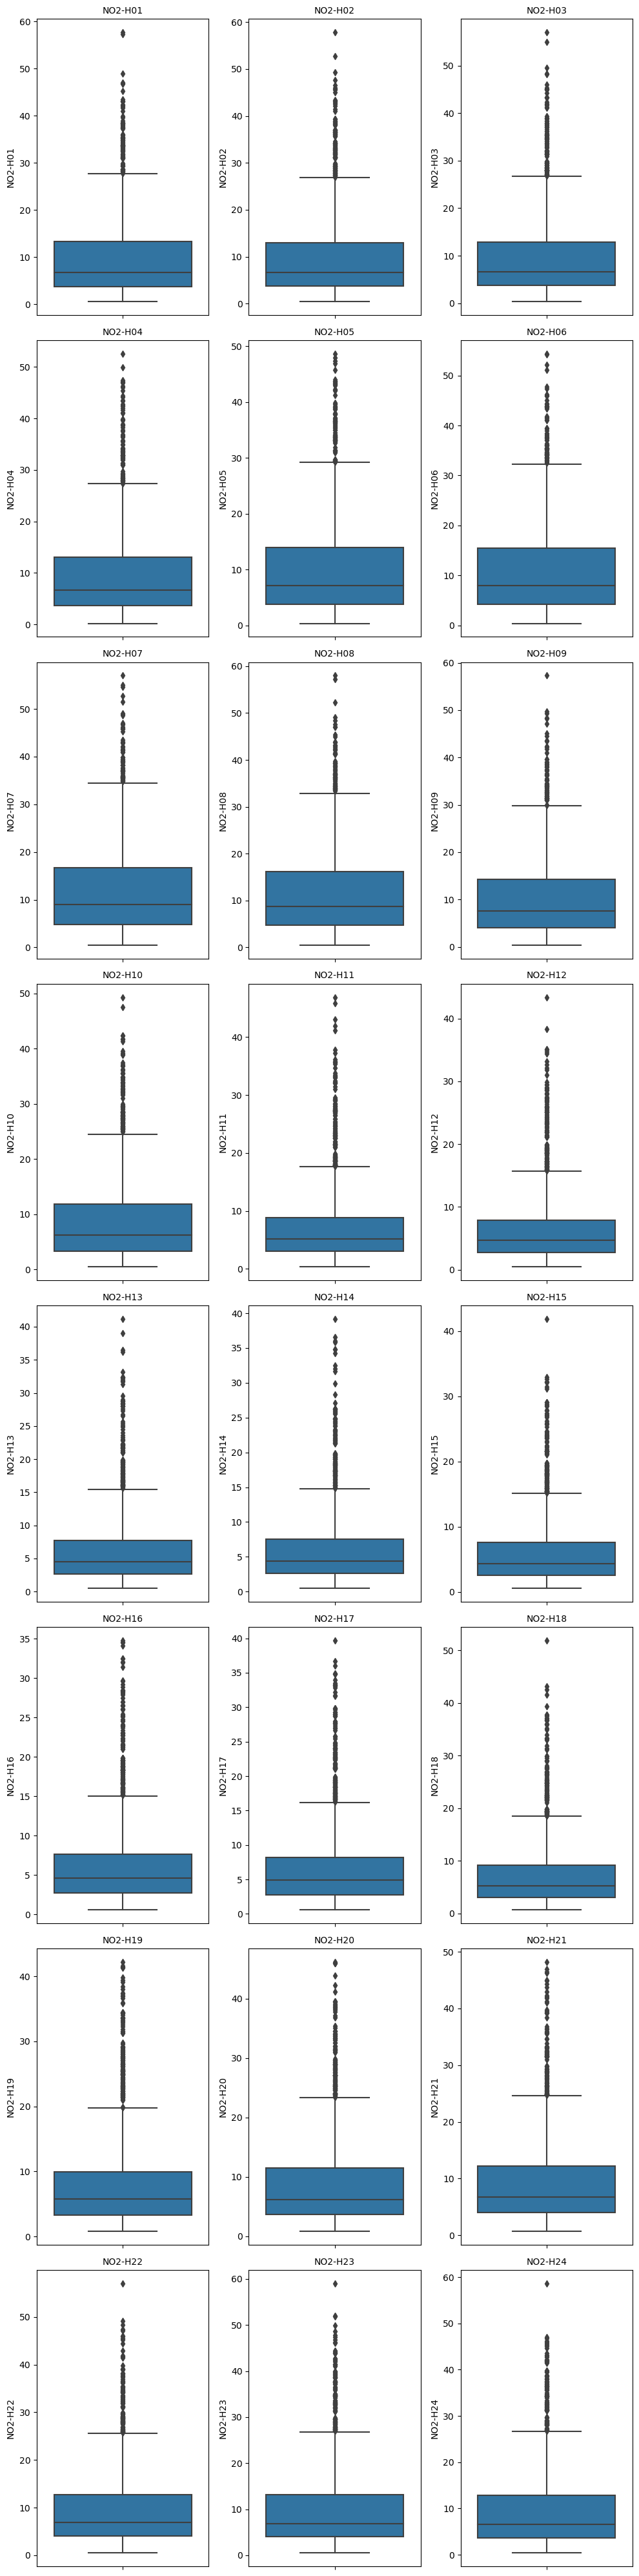

In [24]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p// num_c)  #find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

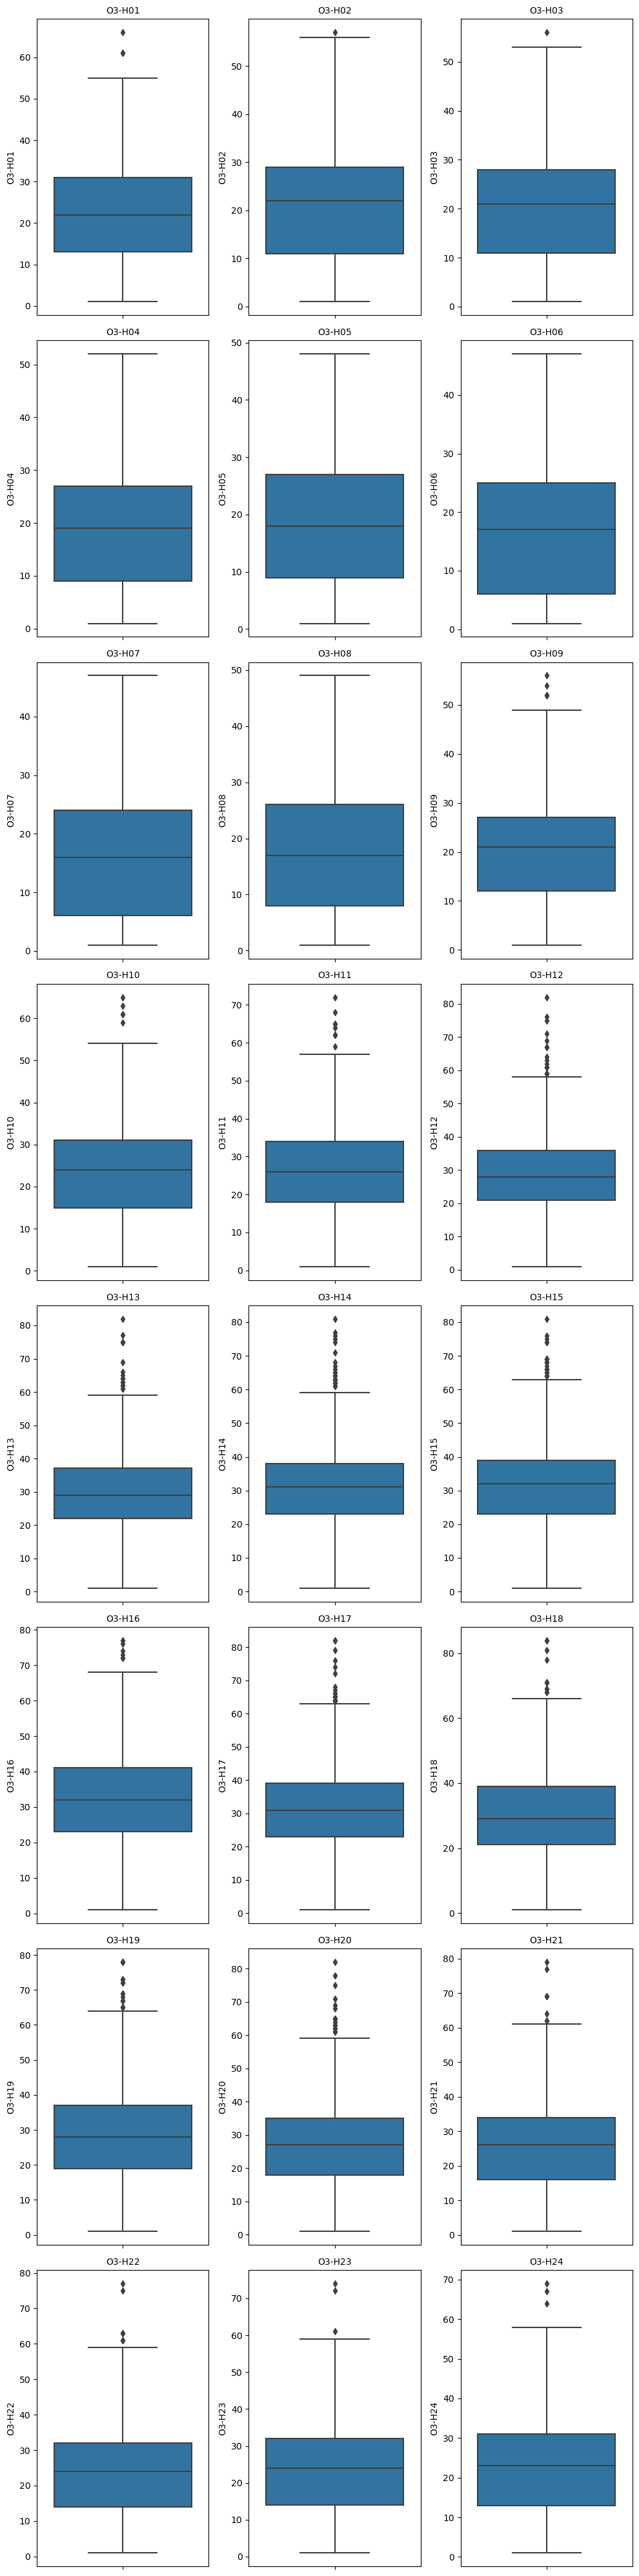

In [25]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

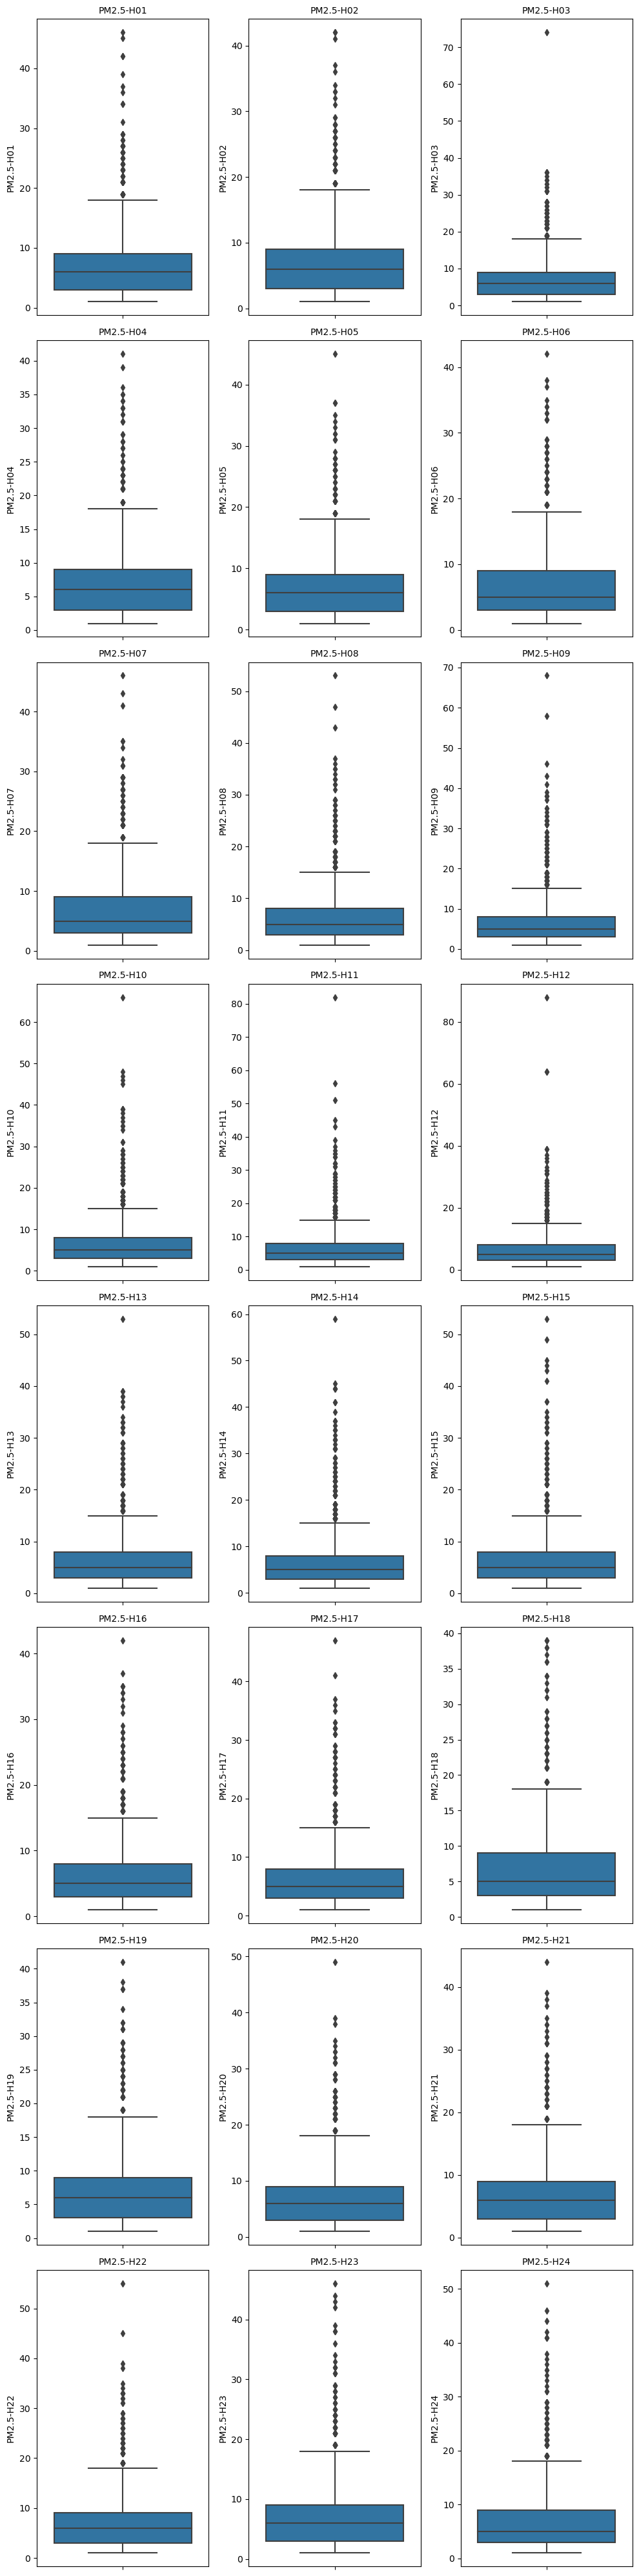

In [26]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3 # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

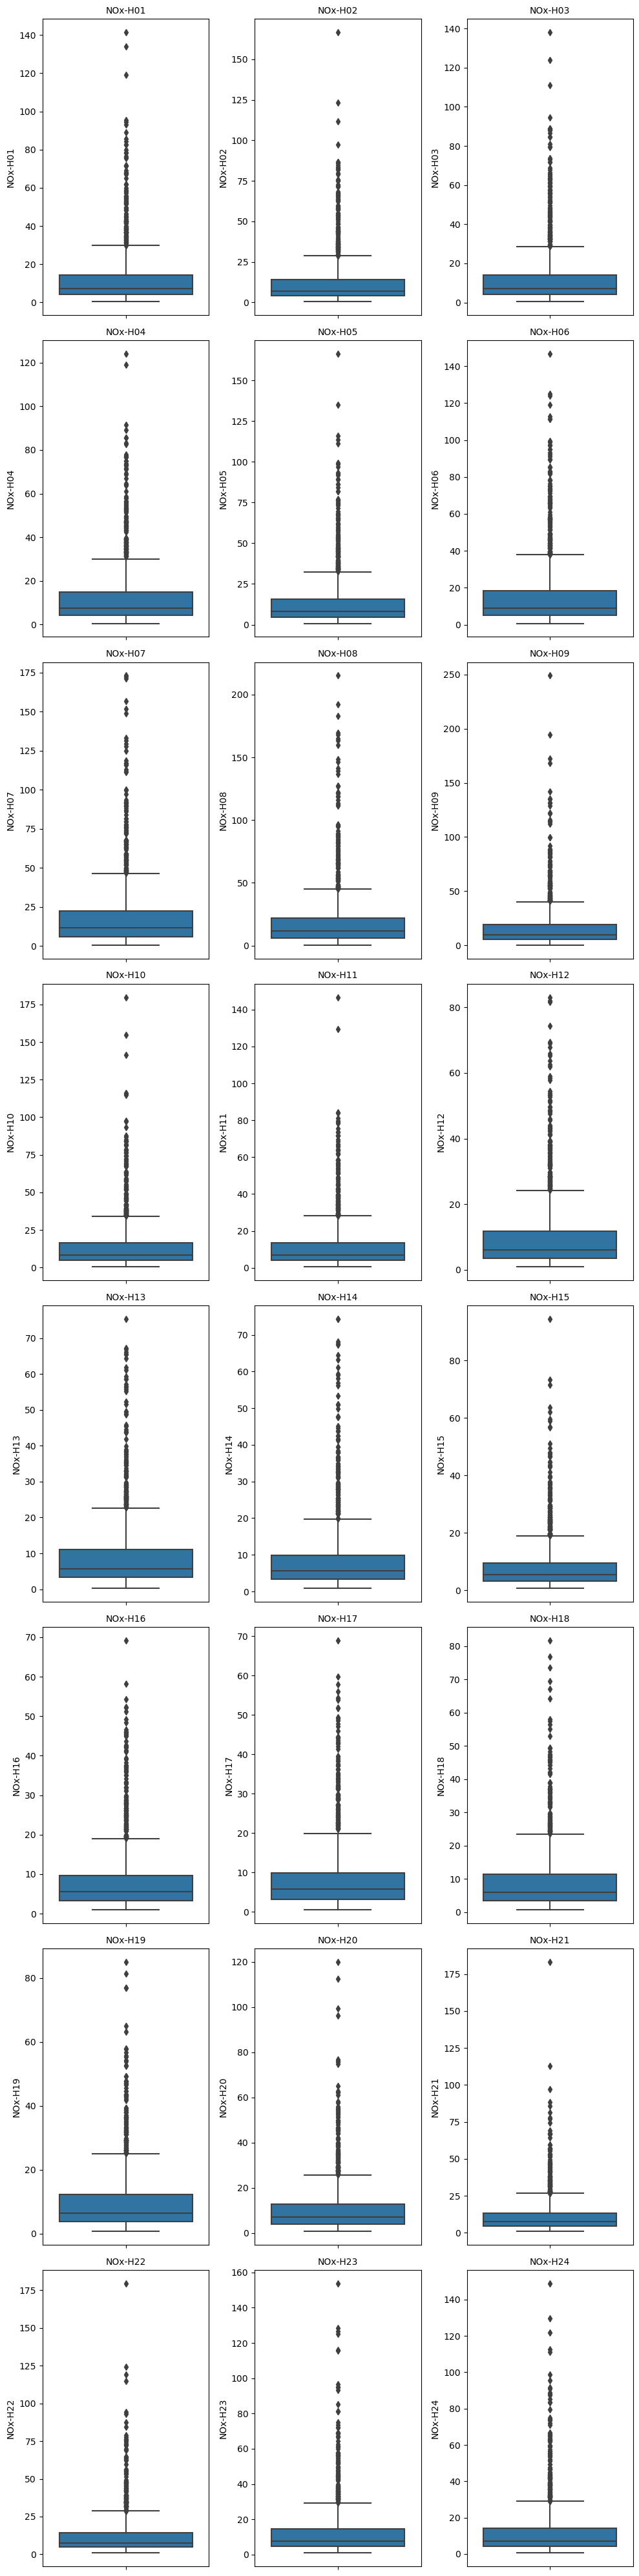

In [27]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Fill the missing values with Mean.

In [29]:
for column in columns_f:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

# Save the updated DataFrame after filling missing values back to a CSV file.
df.to_csv('updated_file.csv', index=False)

print(df)

                  City       Date    SO2-H01   SO2-H02   SO2-H03   SO2-H04  \
0      Ottawa Downtown  2022-01-01  0.600000  0.500000  0.500000  0.400000   
1      Ottawa Downtown  2022-01-02  0.300000  0.300000  0.300000  0.300000   
2      Ottawa Downtown  2022-01-03  0.300000  0.400000  0.400000  0.300000   
3      Ottawa Downtown  2022-01-04  0.400000  0.500000  0.400000  0.400000   
4      Ottawa Downtown  2022-01-05  0.400000  0.400000  0.400000  0.400000   
...                ...         ...       ...       ...       ...       ...   
2185  Windsor Downtown  2022-12-27  0.800000  0.800000  0.700000  0.700000   
2186  Windsor Downtown  2022-12-28  0.100000  0.200000  0.200000  0.300000   
2187  Windsor Downtown  2022-12-29  0.500000  0.500000  0.500000  0.500000   
2188  Windsor Downtown  2022-12-30  0.200000  0.300000  0.300000  0.200000   
2189  Windsor Downtown  2022-12-31  1.732745  1.526564  1.596375  1.553341   

       SO2-H05   SO2-H06   SO2-H07  SO2-H08  ...  NOx-H15  NOx-

In [30]:
100 - (len(df.dropna())/len(df))*100

0.0

In [32]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
# You can select the columns that you want to normalize
columns_to_normalize = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Instantiate the RobustScaler
robust_scaler = RobustScaler()

# Fit the scaler to the selected columns and transform the data
df[columns_to_normalize] = robust_scaler.fit_transform(df[columns_to_normalize])


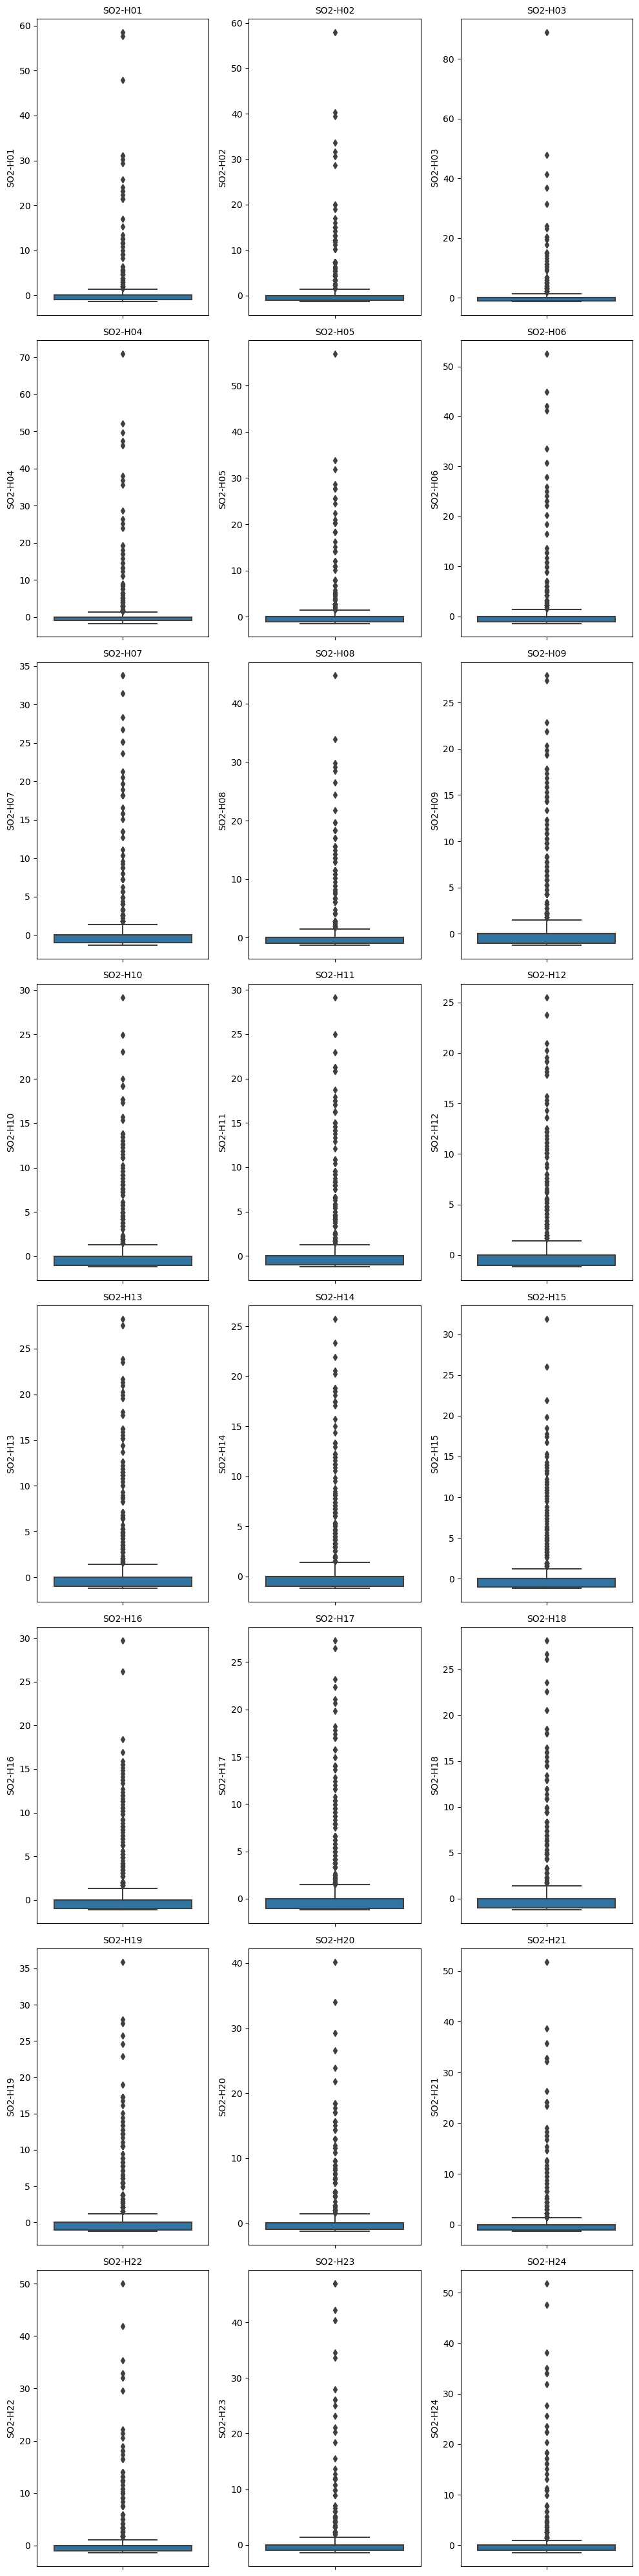

In [33]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

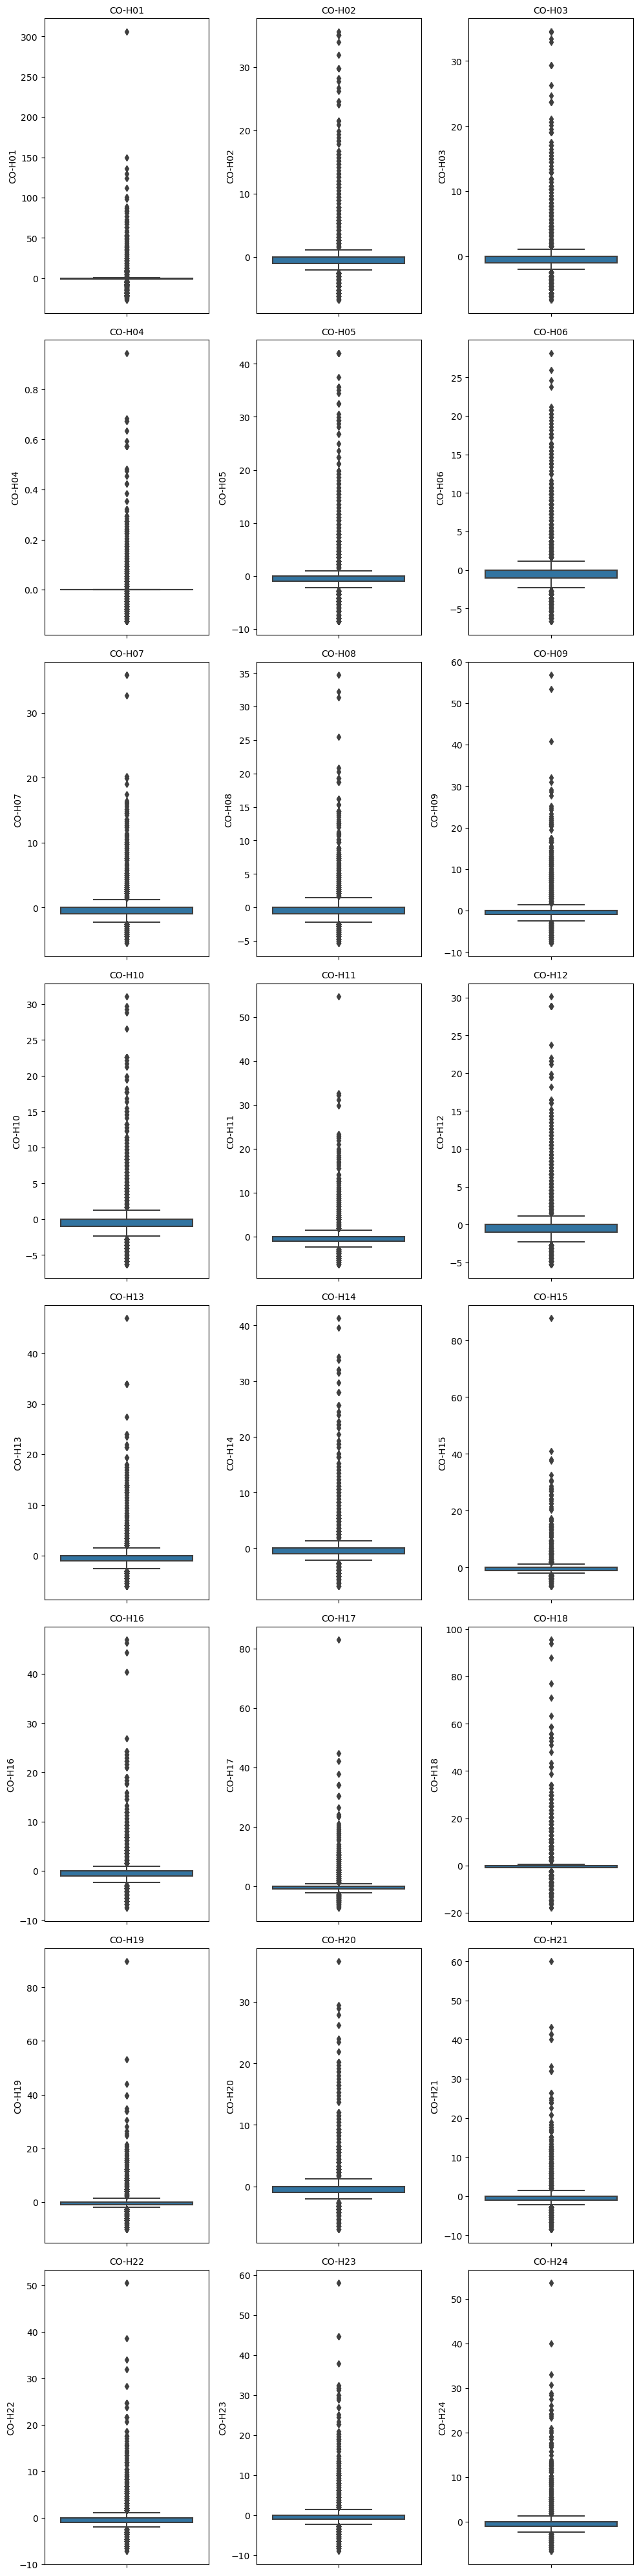

In [34]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

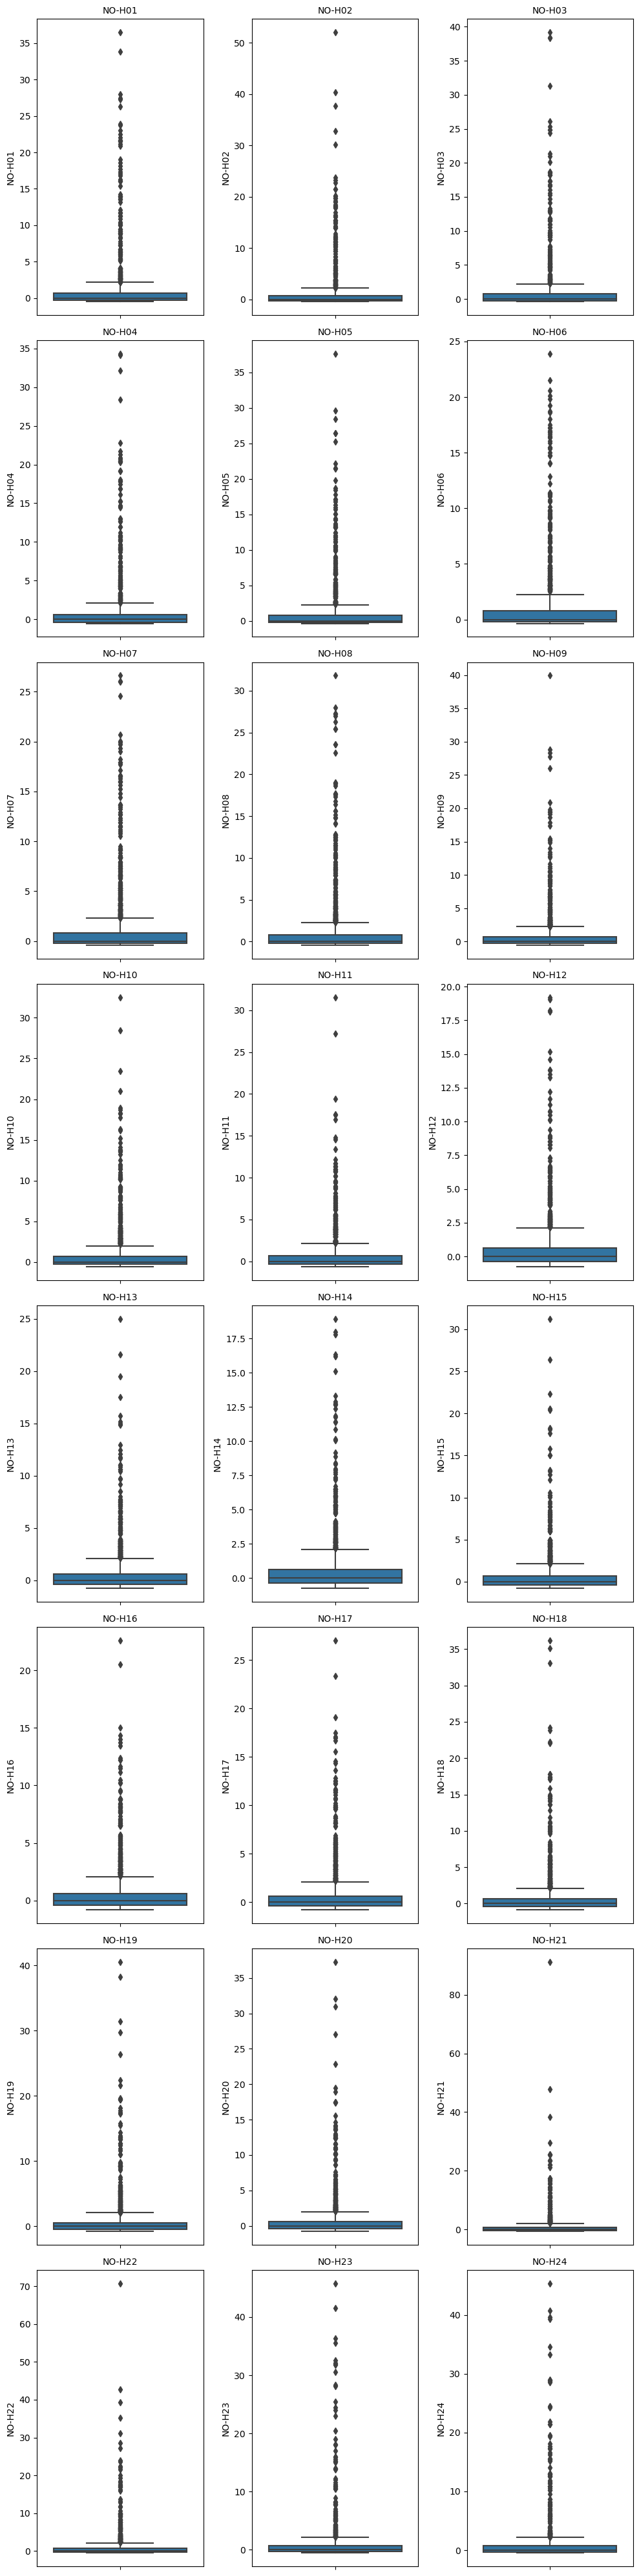

In [35]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

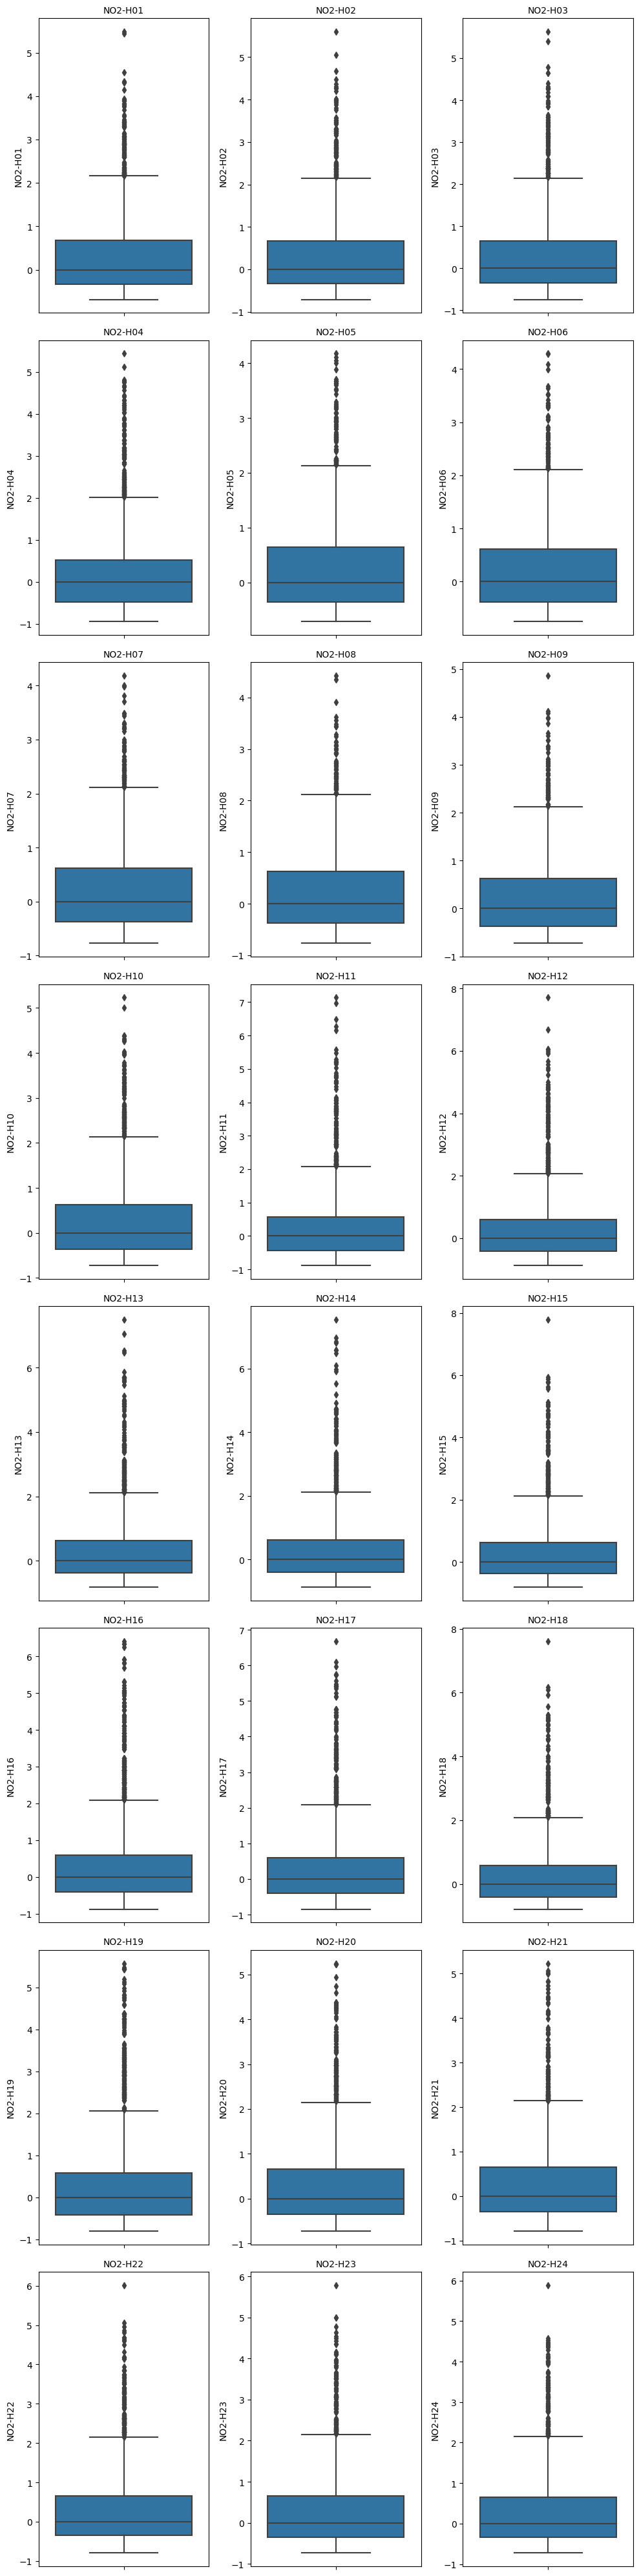

In [36]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p// num_c)  #find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

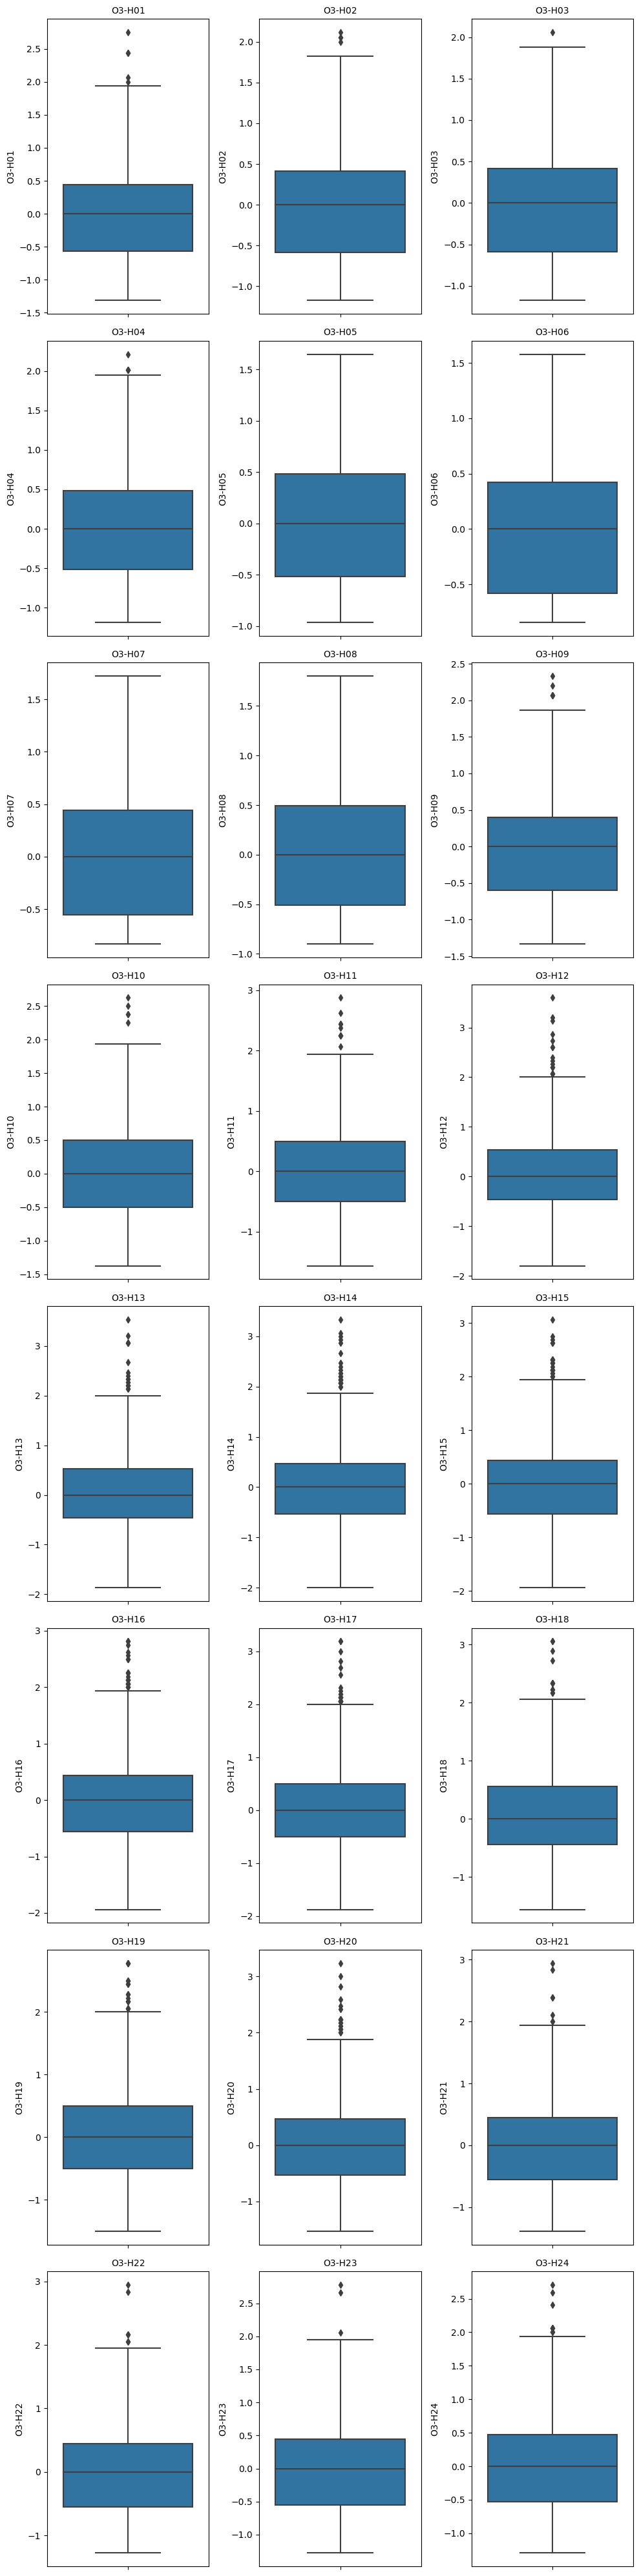

In [37]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

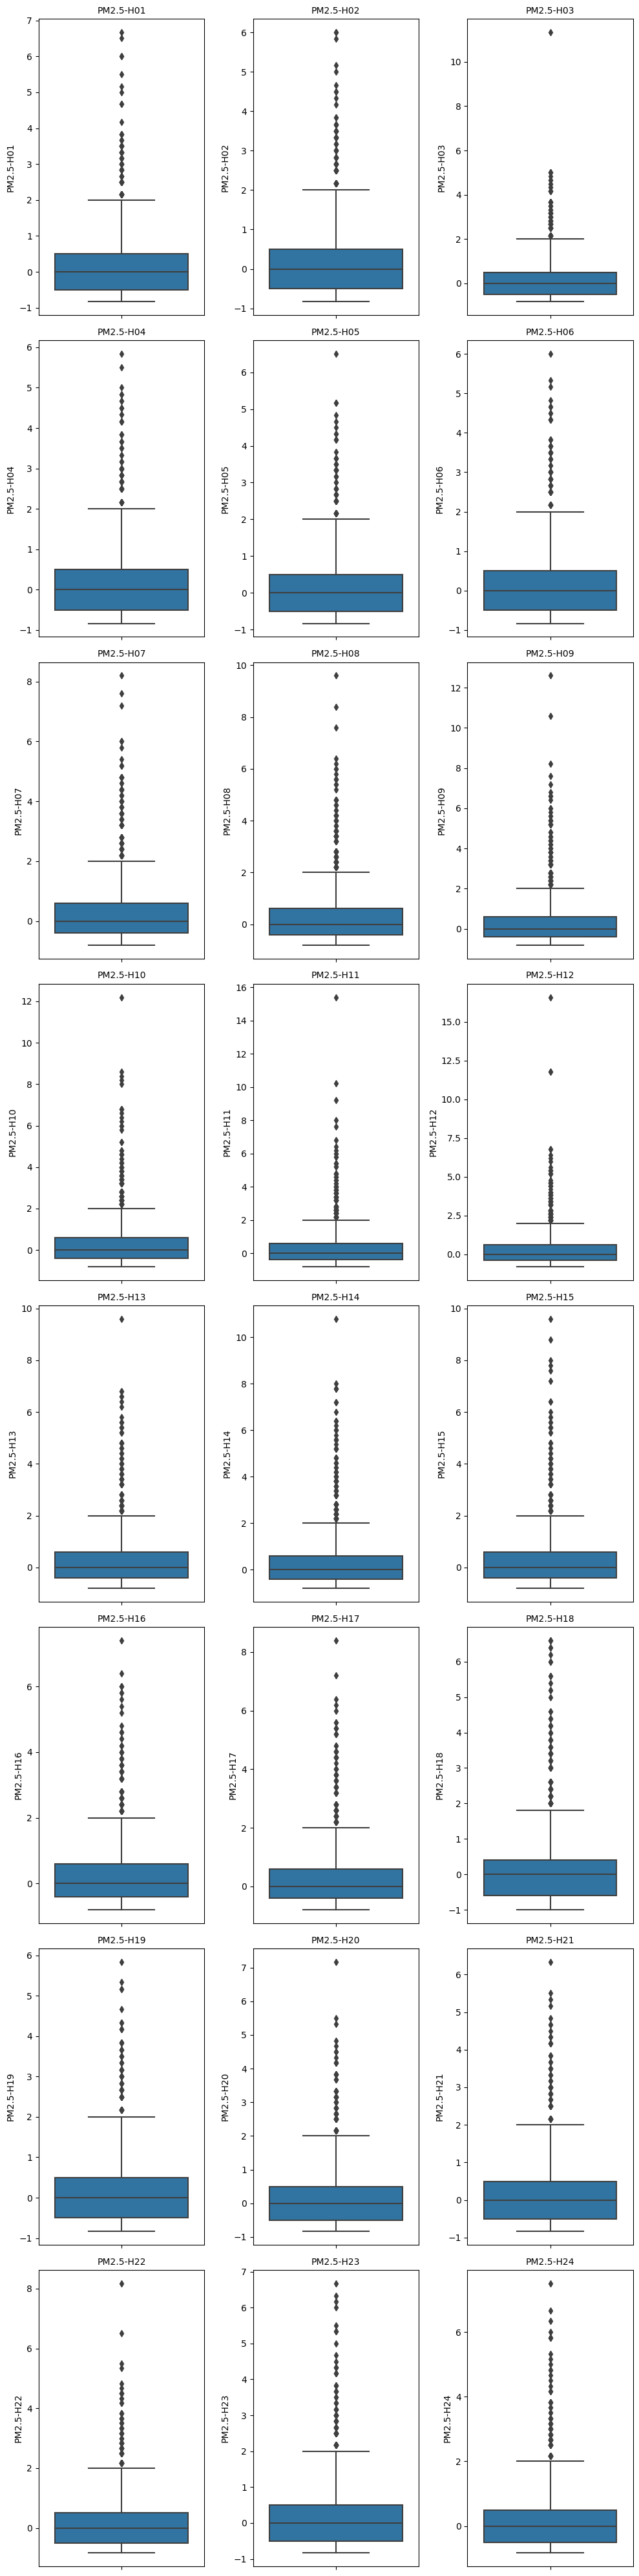

In [38]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3 # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

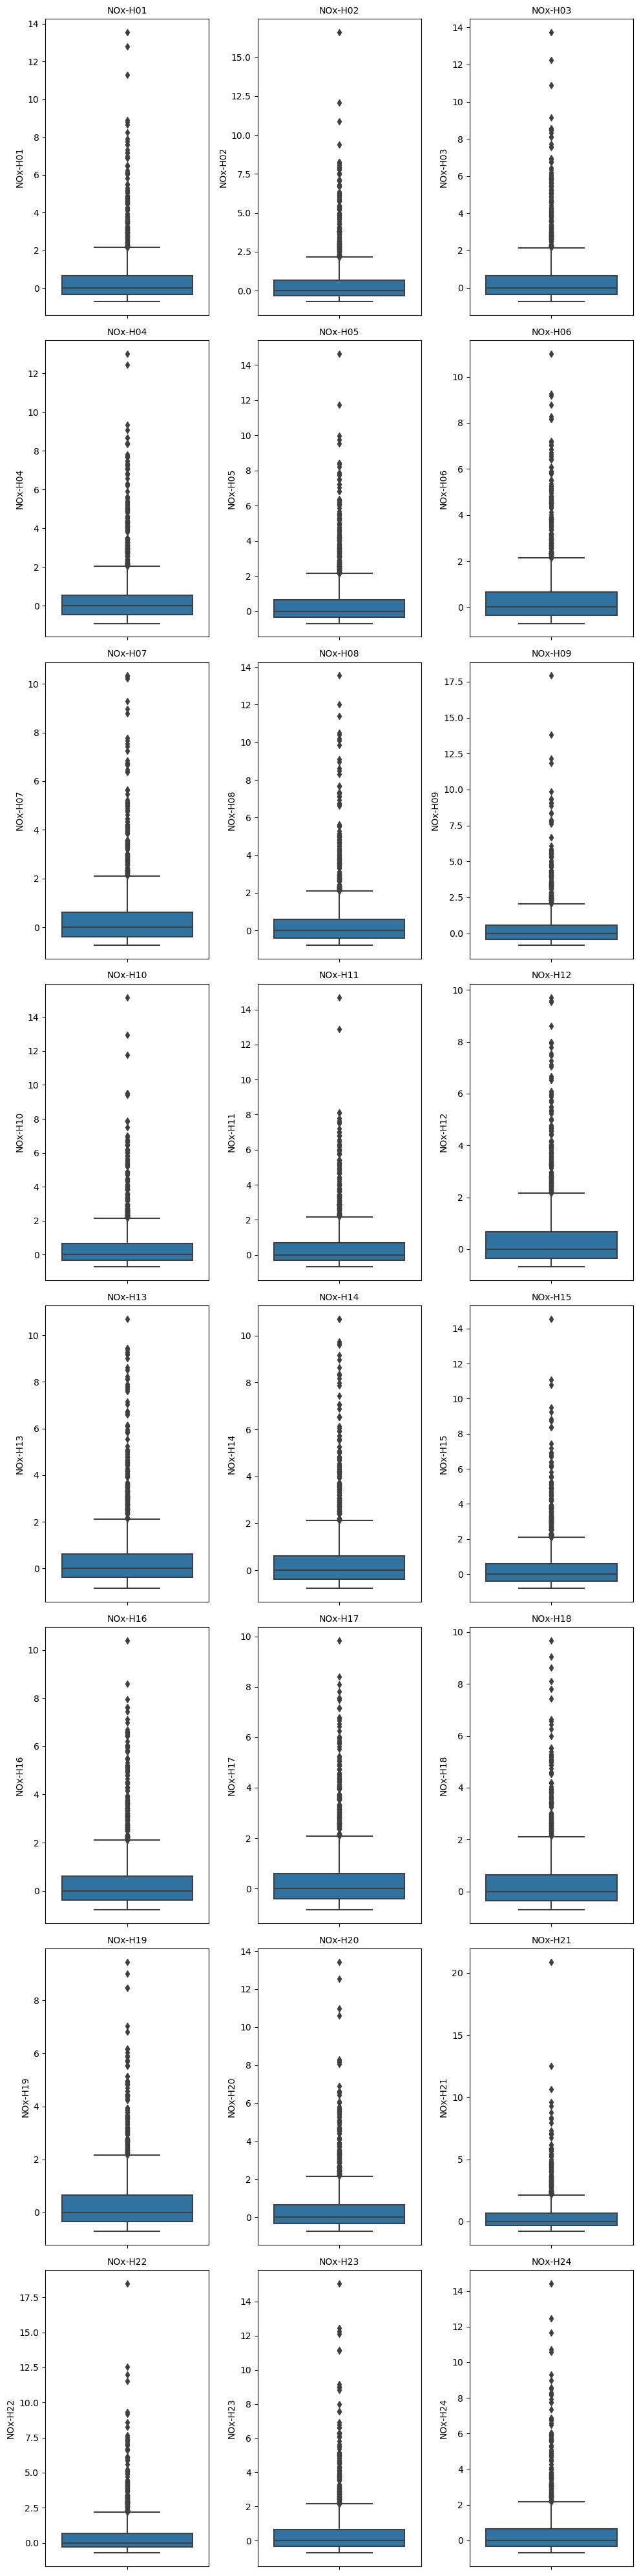

In [39]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()